In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from plotly.offline import iplot
from plotly import tools
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import plotly.figure_factory as ff
from bokeh.plotting import output_notebook, figure, show
from bokeh.models import ColumnDataSource, Div, Select, Button, ColorBar, CustomJS
from bokeh.layouts import row, column, layout
from bokeh.transform import cumsum, linear_cmap
from bokeh.palettes import Blues8, Spectral3
from bokeh.plotting import figure, output_file, show

In [4]:
df = pd.read_csv('datasets/full_data.csv')
df

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN
...,...,...,...,...,...,...
2862,2020-03-13,World,7488.0,338.0,132758,4956.0
2863,2020-03-14,World,9761.0,433.0,142534,5392.0
2864,2020-03-15,World,10967.0,343.0,153517,5735.0
2865,2020-03-16,World,13971.0,855.0,167506,6606.0


In [5]:
df2 = df.fillna(0)

In [6]:
df2

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,0.0,0.0,1,0.0
1,2020-02-26,Afghanistan,0.0,0.0,1,0.0
2,2020-02-27,Afghanistan,0.0,0.0,1,0.0
3,2020-02-28,Afghanistan,0.0,0.0,1,0.0
4,2020-02-29,Afghanistan,0.0,0.0,1,0.0
...,...,...,...,...,...,...
2862,2020-03-13,World,7488.0,338.0,132758,4956.0
2863,2020-03-14,World,9761.0,433.0,142534,5392.0
2864,2020-03-15,World,10967.0,343.0,153517,5735.0
2865,2020-03-16,World,13971.0,855.0,167506,6606.0


In [7]:
df2.groupby(['location']).mean()

,new_cases,new_deaths,total_cases,total_deaths
location,,,,
Afghanistan,0.909091,0.000000,4.363636,0.000000
Albania,5.444444,0.000000,23.444444,0.444444
Algeria,2.809524,0.142857,16.952381,0.666667
Andorra,0.866667,0.000000,2.066667,0.000000
Antigua and Barbuda,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...
Uzbekistan,0.000000,0.000000,4.000000,0.000000
Vatican,0.000000,0.000000,1.000000,0.000000
Venezuela,7.750000,0.000000,9.750000,0.000000


In [8]:
df2['Month'] = df2['date'].str[5:7]
df2['Month'] = df2['Month'].astype('int32')
df2.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,Month
0,2020-02-25,Afghanistan,0.0,0.0,1,0.0,2
1,2020-02-26,Afghanistan,0.0,0.0,1,0.0,2
2,2020-02-27,Afghanistan,0.0,0.0,1,0.0,2
3,2020-02-28,Afghanistan,0.0,0.0,1,0.0,2
4,2020-02-29,Afghanistan,0.0,0.0,1,0.0,2


In [9]:
df2.groupby(['Month']).sum()

,new_cases,new_deaths,total_cases,total_deaths
Month,,,,
1,19034.0,414.0,72914,1704.0
2,151012.0,5402.0,3139412,90190.0
3,187082.0,8906.0,4006728,145802.0


range(1, 4)


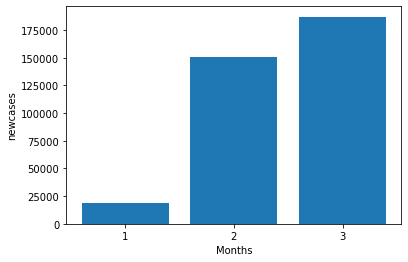

In [10]:
months = range(1,4)
print(months)

plt.bar(months,df2.groupby(['Month']).sum()['new_cases'])
plt.xticks(months)
plt.ylabel('newcases')
plt.xlabel('Months')
plt.show()

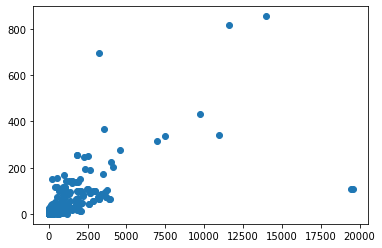

In [11]:
plt.scatter(df.new_cases, df.new_deaths)
plt.show()

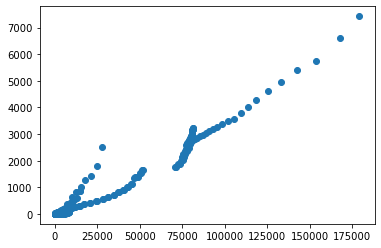

In [12]:
plt.scatter(df.total_cases, df.total_deaths)
plt.show()

In [13]:
df2.describe(include=['object', 'bool'])

,date,location
count,2867,2867
unique,57,161
top,2020-03-17,Thailand
freq,161,57


In [26]:
sns.pairplot(df2.loc[df2['location'] == 'USA'])

In [16]:
Country=pd.DataFrame()
temp = df2.loc[df2["date"]==df2["date"][len(df2)-1]].groupby(['location'])["total_cases"].sum().reset_index()

In [17]:
temp.head(60)

,location,total_cases
0,Afghanistan,21
1,Albania,51
2,Algeria,60
3,Andorra,14
4,Antigua and Barbuda,1
5,Argentina,65
6,Armenia,52
7,Aruba,2
8,Australia,375
9,Austria,1132


In [51]:
Country['Name']=temp["location"]
Country['Values']=temp["total_cases"]

In [52]:
%matplotlib qt
fig = px.choropleth(Country, locations='Name',
                    locationmode='country names',
                    color="Values")
fig.update_layout(title="Spread of Corona Across countries")
fig.show()

In [35]:
Data = train_df.groupby("Date").sum().reset_index()
Data["Date"]= pd.to_datetime(Data["Date"])
source = ColumnDataSource(Data)
p = figure(x_axis_type='datetime')



p.line(x='Date', y='ConfirmedCases', line_width=2, source=source, legend_label='Confirmed Corona Cases')
p.line(x='Date', y='Fatalities', line_width=2, source=source, color=Spectral3[2], legend_label='Death by Corona')

p.yaxis.axis_label = 'Activity of Corona period of time'
show(p)

,date,location,new_cases,new_deaths,total_cases,total_deaths,Month
0,2020-02-25,Afghanistan,0.0,0.0,1,0.0,2
1,2020-02-26,Afghanistan,0.0,0.0,1,0.0,2
2,2020-02-27,Afghanistan,0.0,0.0,1,0.0,2
3,2020-02-28,Afghanistan,0.0,0.0,1,0.0,2
4,2020-02-29,Afghanistan,0.0,0.0,1,0.0,2
...,...,...,...,...,...,...,...
2862,2020-03-13,World,7488.0,338.0,132758,4956.0,3
2863,2020-03-14,World,9761.0,433.0,142534,5392.0,3
2864,2020-03-15,World,10967.0,343.0,153517,5735.0,3
2865,2020-03-16,World,13971.0,855.0,167506,6606.0,3


In [46]:
China_cases = df2.loc[df2["location"]=="China"].groupby("date")["total_cases"].sum().reset_index()
Italy_cases = df2.loc[df2["location"]=="Italy"].groupby("date")["total_cases"].sum().reset_index()
Iran_cases = df2.loc[df2["location"]=="Iran"].groupby("date")["total_cases"].sum().reset_index()
Usa_cases = df2.loc[df2["location"]=="United States"].groupby("date")["total_cases"].sum().reset_index()
Nigeria_cases = df2.loc[df2["location"]=="Nigeria"].groupby("date")["total_cases"].sum().reset_index()

fig = go.Figure()

fig.add_trace(go.Scatter(x=China_cases.date, y=China_cases['total_cases'], name="Cases in China",
                         line_color='deepskyblue'))

fig.add_trace(go.Scatter(x=Italy_cases.date, y=Italy_cases['total_cases'], name="Cases in Itlay",
                         line_color='red'))

fig.add_trace(go.Scatter(x=Iran_cases.date, y=Iran_cases['total_cases'], name="Cases in Iran",
                         line_color='green'))

fig.add_trace(go.Scatter(x=Usa_cases.date, y=Usa_cases['total_cases'], name="Cases in Usa",
                         line_color='yellow'))
fig.add_trace(go.Scatter(x=Nigeria_cases.date, y=Nigeria_cases['total_cases'], name="cases in Nigeria",
                         line_color='pink'))

fig.update_layout(title_text='Spread of COVID-19 over a period of Time',
                  xaxis_rangeslider_visible=True)
fig.show()

In [57]:
China_deaths = df2.loc[df2["location"]=="China"].groupby("date")["total_deaths"].sum().reset_index()
Italy_deaths = df2.loc[df2["location"]=="Italy"].groupby("date")["total_deaths"].sum().reset_index()
Iran_deaths = df2.loc[df2["location"]=="Iran"].groupby("date")["total_deaths"].sum().reset_index()
Usa_deaths = df2.loc[df2["location"]=="United States"].groupby("date")["total_deaths"].sum().reset_index()
Nigeria_deaths = df2.loc[df2["location"]=="Nigeria"].groupby("date")["total_deaths"].sum().reset_index()
World_deaths = df2.loc[df2["location"]=="World"].groupby("date")["total_deaths"].sum().reset_index()

fig = go.Figure()

fig.add_trace(go.Scatter(x=China_deaths.date, y=China_deaths["total_deaths"], name="Fatalities in China",
                         line_color='deepskyblue'))

fig.add_trace(go.Scatter(x=Italy_deaths.date, y=Italy_deaths['total_deaths'], name="Fatalities in Itlay",
                         line_color='red'))

fig.add_trace(go.Scatter(x=Iran_deaths.date, y=Iran_deaths['total_deaths'], name="Fatalities in Iran",
                         line_color='green'))

fig.add_trace(go.Scatter(x=Usa_deaths.date, y=Usa_deaths['total_deaths'], name="Fatalities in Usa",
                         line_color='yellow'))

fig.add_trace(go.Scatter(x=Nigeria_deaths.date, y=Nigeria_deaths['total_deaths'], name="Fatalities in Nigeria",
                         line_color='pink'))

fig.add_trace(go.Scatter(x=World_deaths.date, y=World_deaths['total_deaths'], name="WOrld Fatalities",
                         line_color='purple'))

fig.update_layout(title_text=' COVID-19 fatality over a period of Time',
                  xaxis_rangeslider_visible=True)
fig.show()

In [61]:
China_new_cases = df2.loc[df2["location"]=="China"].groupby("date")["new_cases"].sum().reset_index()
Italy_new_cases = df2.loc[df2["location"]=="Italy"].groupby("date")["new_cases"].sum().reset_index()
Iran_new_cases = df2.loc[df2["location"]=="Iran"].groupby("date")["new_cases"].sum().reset_index()
Usa_new_cases = df2.loc[df2["location"]=="United States"].groupby("date")["new_cases"].sum().reset_index()
Nigeria_new_cases = df2.loc[df2["location"]=="Nigeria"].groupby("date")["new_cases"].sum().reset_index()

fig = go.Figure()

fig.add_trace(go.Scatter(x=China_cases.date, y=China_new_cases['new_cases'], name="Cases in China",
                         line_color='deepskyblue'))

fig.add_trace(go.Scatter(x=Italy_cases.date, y=Italy_new_cases['new_cases'], name="Cases in Itlay",
                         line_color='red'))

fig.add_trace(go.Scatter(x=Iran_cases.date, y=Iran_new_cases['new_cases'], name="Cases in Iran",
                         line_color='green'))

fig.add_trace(go.Scatter(x=Usa_cases.date, y=Usa_new_cases['new_cases'], name="Cases in Usa",
                         line_color='yellow'))
fig.add_trace(go.Scatter(x=Nigeria_cases.date, y=Nigeria_new_cases['new_cases'], name="cases in Nigeria",
                         line_color='pink'))

fig.update_layout(title_text='Spread of COVID-19 over a period of Time',
                  xaxis_rangeslider_visible=True)
fig.show()

In [63]:
China_new_deaths = df2.loc[df2["location"]=="China"].groupby("date")["new_deaths"].sum().reset_index()
Italy_new_deaths = df2.loc[df2["location"]=="Italy"].groupby("date")["new_deaths"].sum().reset_index()
Iran_new_deaths = df2.loc[df2["location"]=="Iran"].groupby("date")["new_deaths"].sum().reset_index()
Usa_new_deaths = df2.loc[df2["location"]=="United States"].groupby("date")["new_deaths"].sum().reset_index()
Nigeria_new_deaths = df2.loc[df2["location"]=="Nigeria"].groupby("date")["new_deaths"].sum().reset_index()

fig = go.Figure()

fig.add_trace(go.Scatter(x=China_deaths.date, y=China_new_deaths["new_deaths"], name="Fatalities in China",
                         line_color='deepskyblue'))

fig.add_trace(go.Scatter(x=Italy_deaths.date, y=Italy_new_deaths['new_deaths'], name="Fatalities in Itlay",
                         line_color='red'))

fig.add_trace(go.Scatter(x=Iran_deaths.date, y=Iran_new_deaths['new_deaths'], name="Fatalities in Iran",
                         line_color='green'))

fig.add_trace(go.Scatter(x=Usa_deaths.date, y=Usa_new_deaths['new_deaths'], name="Fatalities in Usa",
                         line_color='yellow'))

fig.add_trace(go.Scatter(x=Nigeria_deaths.date, y=Nigeria_new_deaths['new_deaths'], name="Fatalities in Nigeria",
                         line_color='pink'))

fig.update_layout(title_text=' COVID-19 fatality over a period of Time',
                  xaxis_rangeslider_visible=True)
fig.show()

In [56]:
Data = df2.groupby("date").sum().reset_index()
Data["date"]= pd.to_datetime(Data["date"])
source = ColumnDataSource(Data)
p = figure(x_axis_type='datetime')



p.line(x='date', y='total_cases', line_width=2, source=source, legend_label='Confirmed Corona Cases')
p.line(x='date', y='total_deaths', line_width=2, source=source, color=Spectral3[2], legend_label='Death by Corona')

p.yaxis.axis_label = 'Activity of Corona period of time'
show(p)

In [58]:
Disease_through_Country = pd.DataFrame()
Disease_through_Country = df2.groupby(["location"]).sum().reset_index()

Names = ["total_cases","total_deaths"]
for i in Names:
    Disease_through_Country[i+"_percentage"] = Disease_through_Country[i]/Disease_through_Country[Names].sum(axis=1)*100
    Disease_through_Country[i+"_angle"] = Disease_through_Country[i+"_percentage"]/100 * 2*np.pi
    
Disease_through_Country_plot = pd.DataFrame({'class': ["total_cases","total_deaths"],
                                              'percent': [float('nan'), float('nan')],
                                              'angle': [float('nan'), float('nan')],
                                              'color': [ '#718dbf', '#e84d60']})
Disease_through_Country_plot

,class,percent,angle,color
0,total_cases,NaN,NaN,#718dbf
1,total_deaths,NaN,NaN,#e84d60


In [59]:
s2 = ColumnDataSource(Disease_through_Country)
s2_plot = ColumnDataSource(Disease_through_Country_plot)

# Create the Figure object "p2"
p2 = figure(plot_width=475, plot_height=550, y_range=(-0.5, 0.7),toolbar_location=None, tools=['hover'], tooltips='@percent{0.0}%')

# Add circular sectors to "p2"
p2.wedge(x=0, y=0, radius=0.8, source=s2_plot,start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),fill_color='color', line_color=None, legend='class')

# Change parameters of "p2"
p2.axis.visible = False
p2.grid.grid_line_color = None
p2.legend.orientation = 'horizontal'
p2.legend.location = 'top_center'

# Create the custom JavaScript callback
callback2 = CustomJS(args=dict(s2=s2, s2_plot=s2_plot), code='''
    var ang = ['total_cases_angle', 'total_deaths_angle'];
    var per = ['total_cases_percentage',  'total_deaths_percentage'];
    if (cb_obj.value != 'Please choose...') {
        var disease = s2.data['location'];
        var ind = disease.indexOf(cb_obj.value);
        for (var i = 0; i < ang.length; i++) {
            s2_plot.data['angle'][i] = s2.data[ang[i]][ind];
            s2_plot.data['percent'][i] = s2.data[per[i]][ind];
            
        }
    }
    else {
        for (var i = 0; i < ang.length; i++) {
            s2_plot.data['angle'][i] = undefined;
            s2_plot.data['percent'][i] = undefined;
        }

    }
    s2_plot.change.emit();
''')

# When changing the value of the dropdown menu execute "callback2"
options = ['Please choose...'] + list(s2.data['location'])
select = Select(title='Country ', value=options[0], options=options)
select.js_on_change('value', callback2)

# Display "select" and "p2" as a column
show(column(select, p2))

In [14]:
df['new_cases'].value_counts()

0.0      1401
1.0       208
2.0       120
3.0        96
4.0        64
         ... 
212.0       1
86.0        1
53.0        1
114.0       1
131.0       1
Name: new_cases, Length: 319, dtype: int64

In [13]:
df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d')

In [14]:
df2

,date,location,new_cases,new_deaths,total_cases,total_deaths,Month
0,2020-02-25,Afghanistan,0.0,0.0,1,0.0,2
1,2020-02-26,Afghanistan,0.0,0.0,1,0.0,2
2,2020-02-27,Afghanistan,0.0,0.0,1,0.0,2
3,2020-02-28,Afghanistan,0.0,0.0,1,0.0,2
4,2020-02-29,Afghanistan,0.0,0.0,1,0.0,2
...,...,...,...,...,...,...,...
2862,2020-03-13,World,7488.0,338.0,132758,4956.0,3
2863,2020-03-14,World,9761.0,433.0,142534,5392.0,3
2864,2020-03-15,World,10967.0,343.0,153517,5735.0,3
2865,2020-03-16,World,13971.0,855.0,167506,6606.0,3


In [15]:
df2.loc[0, 'date'].day_name()

'Tuesday'

In [16]:
df2['date'].dt.day_name()

0         Tuesday
1       Wednesday
2        Thursday
3          Friday
4        Saturday
          ...    
2862       Friday
2863     Saturday
2864       Sunday
2865       Monday
2866      Tuesday
Name: date, Length: 2867, dtype: object

In [17]:
df2['day_of_the_week'] = df2['date'].dt.day_name()

In [18]:
df2

,date,location,new_cases,new_deaths,total_cases,total_deaths,Month,day_of_the_week
0,2020-02-25,Afghanistan,0.0,0.0,1,0.0,2,Tuesday
1,2020-02-26,Afghanistan,0.0,0.0,1,0.0,2,Wednesday
2,2020-02-27,Afghanistan,0.0,0.0,1,0.0,2,Thursday
3,2020-02-28,Afghanistan,0.0,0.0,1,0.0,2,Friday
4,2020-02-29,Afghanistan,0.0,0.0,1,0.0,2,Saturday
...,...,...,...,...,...,...,...,...
2862,2020-03-13,World,7488.0,338.0,132758,4956.0,3,Friday
2863,2020-03-14,World,9761.0,433.0,142534,5392.0,3,Saturday
2864,2020-03-15,World,10967.0,343.0,153517,5735.0,3,Sunday
2865,2020-03-16,World,13971.0,855.0,167506,6606.0,3,Monday


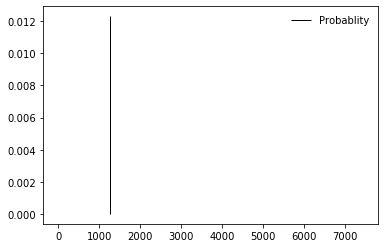

In [26]:
from scipy import stats
from scipy.stats import binom
fig, ax = plt.subplots(1,1)
x = df2.total_deaths
n, p = 2500, 0.5
rv = binom(n,p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,label='Probablity')
ax.legend(loc='best', frameon=False)

In [33]:
df2

,date,location,new_cases,new_deaths,total_cases,total_deaths,Month,day_of_the_week
0,2020-02-25,Afghanistan,0.0,0.0,1,0.0,2,Tuesday
1,2020-02-26,Afghanistan,0.0,0.0,1,0.0,2,Wednesday
2,2020-02-27,Afghanistan,0.0,0.0,1,0.0,2,Thursday
3,2020-02-28,Afghanistan,0.0,0.0,1,0.0,2,Friday
4,2020-02-29,Afghanistan,0.0,0.0,1,0.0,2,Saturday
...,...,...,...,...,...,...,...,...
2862,2020-03-13,World,7488.0,338.0,132758,4956.0,3,Friday
2863,2020-03-14,World,9761.0,433.0,142534,5392.0,3,Saturday
2864,2020-03-15,World,10967.0,343.0,153517,5735.0,3,Sunday
2865,2020-03-16,World,13971.0,855.0,167506,6606.0,3,Monday


In [28]:
re = stats.poisson(df2.new_cases.mean())
re.pmf(23)

4.8272997643774135e-29

In [29]:
stats.zscore(df2.new_deaths)

array([-0.14343151, -0.14343151, -0.14343151, ...,  9.43732001,
       23.73861675, 22.73305682])

In [30]:
prob = 1 - stats.norm.cdf(-0.14343151)
prob

0.5570253005691173

In [31]:
(0.5570253005691173 * df.new_deaths.std()) + df.new_deaths.mean()

71.16967270966738

In [32]:
zscore = ( 100 - df2.new_deaths.mean() ) / df2.new_deaths.std()
zscore

2.6493283472483005

In [42]:
prob = 1 - stats.norm.cdf(zscore)
prob

0.004032596557892454

In [36]:
df2.groupby['day_of_the_week'].max() - df2.groupby['day_of_the_week'].min()

TypeError: 'method' object is not subscriptable

In [60]:
df2.corr()

,new_cases,new_deaths,total_cases,total_deaths,Month
new_cases,1.000000,0.712025,0.624136,0.601399,-0.032818
new_deaths,0.712025,1.000000,0.693950,0.731909,-0.004259
total_cases,0.624136,0.693950,1.000000,0.986913,-0.015477
total_deaths,0.601399,0.731909,0.986913,1.000000,0.003581
Month,-0.032818,-0.004259,-0.015477,0.003581,1.000000


In [49]:
X = df2.drop(['total_deaths','date','location','day_of_the_week'], axis='columns')

In [50]:
y = df2.total_deaths
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
2862    4956.0
2863    5392.0
2864    5735.0
2865    6606.0
2866    7426.0
Name: total_deaths, Length: 2867, dtype: float64

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=5)

In [52]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
clf.score(X_test,y_test)

0.9752573874441134

In [54]:
ypred = clf.predict(X_test)

In [55]:
df3 = pd.DataFrame({'actual':y_test, 'predicted':ypred})
df3

,actual,predicted
1478,0.0,0.941441
232,0.0,0.907936
2859,4012.0,3988.166862
938,0.0,-11.185132
856,3.0,4.294000
...,...,...
2815,56.0,36.490194
1730,5.0,15.457672
1134,0.0,-9.734241
2214,0.0,1.559089


In [56]:
df3.head(50)

,actual,predicted
1478,0.0,0.941441
232,0.0,0.907936
2859,4012.0,3988.166862
938,0.0,-11.185132
856,3.0,4.294000
170,0.0,4.532302
1106,0.0,1.688738
1333,0.0,-11.107925
12,0.0,0.683603
1764,0.0,0.721477


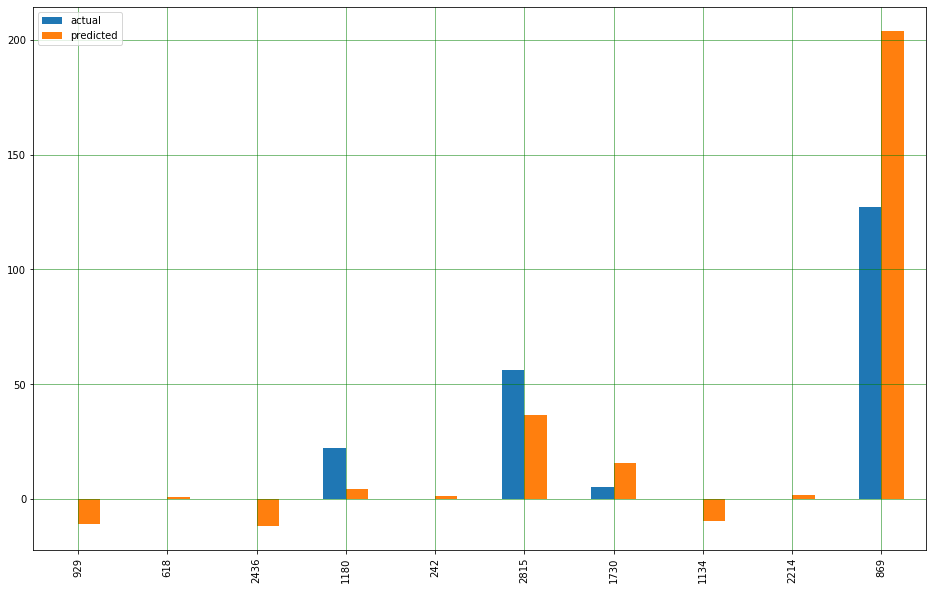

In [58]:
df4 = df3.tail(10)
df4.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

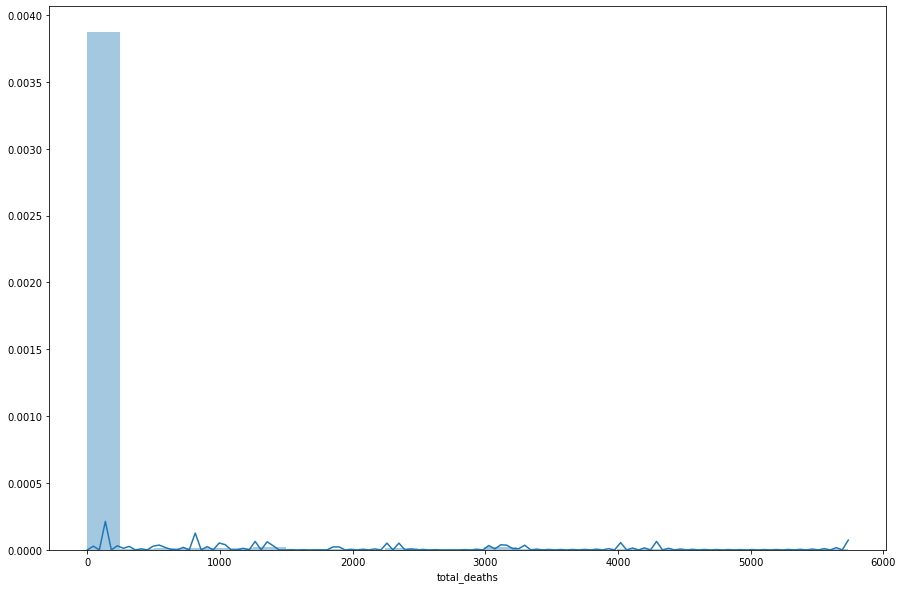

In [60]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(y_test)